In [9]:
import numpy as np

def make_data(N, err=1):
    rgn = np.random.RandomState(43)
    X = rgn.rand(N,1) ** 2
    Y = 10 - 1 / (X + 0.1)
    if err > 0 : #noise data
        Y += err * rgn.randn(N,1)
    return X, Y

X, Y = make_data(40)

In [49]:
len(X)

40

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

<function matplotlib.pyplot.show(*args, **kw)>

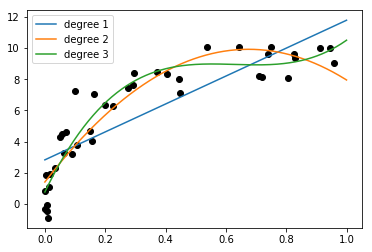

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X,Y, color = 'black')

X_test = np.linspace(0,1,500)[:,None]
for i in range(1,4):
    Y_test = PolynomialRegression(i).fit(X,Y).predict(X_test)
    plt.plot(X_test ,Y_test, label = 'degree {}'.format(i))

plt.legend(loc='best')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

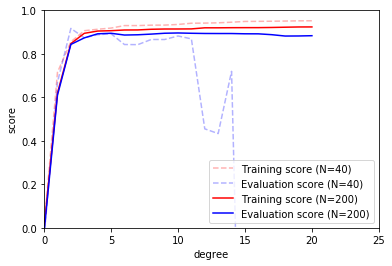

In [46]:
# Validation curve
from sklearn.model_selection import validation_curve
X2, Y2 = make_data(200)

degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, Y,
                                          'polynomialfeatures__degree', degree, cv=5)

train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, Y2,
                                          'polynomialfeatures__degree', degree, cv=5)

plt.plot(degree, np.median(train_score,1), color = 'red', alpha=0.3, linestyle='dashed', label = 'Training score (N=40)')
plt.plot(degree, np.median(val_score,1), color = 'blue',  alpha=0.3, linestyle='dashed',label = 'Evaluation score (N=40)')

plt.plot(degree, np.median(train_score2,1), color = 'red', label = 'Training score (N=200)')
plt.plot(degree, np.median(val_score2,1), color = 'blue', label = 'Evaluation score (N=200)')

plt.legend(loc = 'best')
plt.ylim(0,1)
plt.xlim(0,25)
plt.xlabel('degree')
plt.ylabel('score')
plt.show



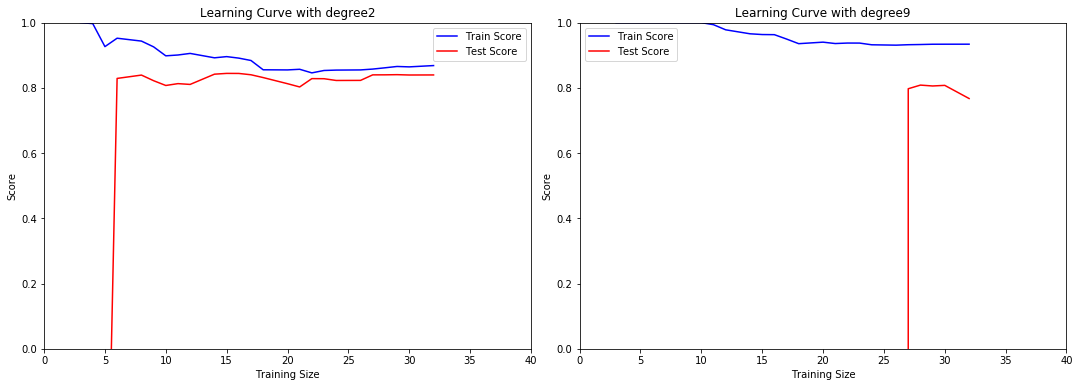

In [61]:
# Learning curve
# Feature: size of the training set

from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2,9]):
    train_sizes_abs, train_scores, test_scores = learning_curve(PolynomialRegression(degree), X, Y,
                                                            train_sizes=np.linspace(0.1, 1, 25), cv=5)

    #print(train_scores)

#train_sizes_abs
    ax[i].plot(train_sizes_abs, np.mean(train_scores,1), color = 'blue', label = 'Train Score')
    ax[i].plot(train_sizes_abs, np.mean(test_scores,1), color = 'red', label = 'Test Score')

    ax[i].set_xlim(0, len(X))
    ax[i].set_ylim(0, 1)
    ax[i].set_xlabel('Training Size')
    ax[i].set_ylabel('Score')
    ax[i].legend(loc='best')
    ax[i].set_title('Learning Curve with degree{}'.format(degree))
